<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Cel przedmiotu:

* prezentacja standardowych architektur używanych w uczeniu maszynowym
* zaprogramowanie w uczestnikach sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym

<br></br>
<br></br>

# Forma przedmiotu: warsztaty
* nacisk położony na uzyskanie sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym
* część mówiona przez wykładowcę przeplatana z samodzielnymi ćwiczeniami

# Plan warsztatów:

* przygotowanie środowiska i rozgrzewka z programowania w Pythonie i analizy danych
* przypomnienie podstawowych pojęć w uczeniu maszynowym
* sieci w pełni połączone
* sieci konwolucyjne
* autokodery
* transfer modeli (ang. transfer learning)
* atencja
* 8
* 9
* 10
* 11
* 12
* 13
* 14

# Zasady zaliczania:

* obecność obowiązkowa - 2 nieusprawiedliwione nieobecności dozwolone.
  [Lista obecności]() na Kampus2
* obowiązkowe prace domowe po każdych zajęciach
* zaliczenie na podstawie samodzielnie wykonanego Projektu.
    * Projekt musi być wykonany w postaci czytelnego notatnika Jupyter
    * pliki Projektu muszą być załadowane na czas do Kampus2
    * dane wejściowe muszą być dostępne przez WWW: ogólnodostępne dane, lub dane umieszczone na dysku Google
    * Projekt musi być wykonany zgodnie z harmonogramem:
        * **25.03.2024**: definicja Projektu i konsultacja jego wykonywalności 
        * **14.04.2024**: notatnik z wstępną obróbką danych
        * **31.05.2024**: notatnik finalną wersją rozwiązania

# Infrastruktura:

* **Google Colaboratory** - chmura obliczeniowa:
    * minimalny narzut związany z instalacją
    * wygodny dostęp przez WWW 
    * ograniczona ilość zasobów
    * nie skaluje się do zaawansowanych zastosowań

<br></br>
<br></br>
 
* **własna maszyna** - kontener:
    * wymaga pewnego wysiłku przy konfiguracji
    * pozwala na użycie własnych zasobów obliczeniowych
    * łatwy do przeniesienia na inne maszyny
    * standardowa technologia używania w IT

# Przygotowanie środowiska -  Google Colaboratory

**Proszę:**

* skorzystać z [linku]() w Kampus2 i otworzyć ten notatnik w Colab
* uruchomić maszynę wirtualną
* wyświetlić zużycie zasobów maszyny wirtualnej:

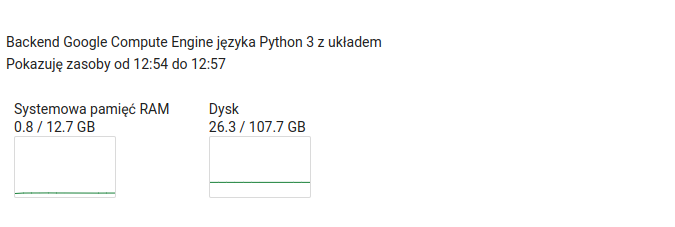

* zmienić typ środowiska wykonawczego na `GPU` i ponownie wyświetlić zużycie zasobów:

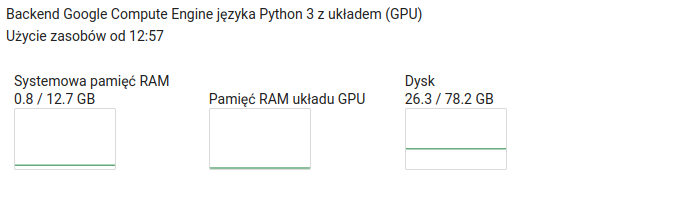

**Proszę**:

* zaimportować bibliotekę `tensorflow` pod nazwą `tf`
* wypisać na ekran:
    * wersję biblioteki zapisaną w polu `__version__`
    * wypisać liczbę dostępnych GPU:
      ```Python
      tf.config.list_physical_devices('GPU')
      ```
    * wypisać nazwę dostępnego GPU:
      ```Python
       tf.config.experimental.get_device_details(gpu_devices[0])
      ``` 

In [1]:
import tensorflow as tf
#BEGIN_SOLUTION
print("TF version:",tf.__version__)
print(tf.config.list_physical_devices('GPU'))

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  details = tf.config.experimental.get_device_details(gpu_devices[0])
  print("GPU name:",details['device_name'])
#END_SOLUTION
pass

2023-09-20 14:07:43.092119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF version: 2.13.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU name: NVIDIA GeForce RTX 2070 SUPER


2023-09-20 14:07:44.686488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 14:07:44.691351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 14:07:44.691500: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

**Proszę:**

Skorzystać z eksploratora plików w menu Colab po lewej

* stworzyć katalog `data`
* pobrać [plik](https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv) w formacie CSV i załadować go do katalogu `dane` jako `rowery.csv`
* wczytać plik i wypisać pierwszą linię 

In [2]:
#BEGIN_SOLUTION
fileName = 'data/rowery.csv'
input_file = open(fileName, 'r')

for line in input_file:
    print(line)
    break
#END_SOLUTION
pass

 ,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Średnia temp.,Min. temp.,Maks. temp.,Odczuwalna temp.,Opady (mm),Wiatr



**Proszę:**

* na swoim dysku Google utworzyć katalog `data`
* umieścić plik `rowery.csv` w katalogu `data` na dysku Google
* wczytać plik z dysku Google i wypisać pierwszą linię

In [3]:
#BEGIN_SOLUTION
import sys
if 'google.colab' in sys.modules:
    
    from google.colab import drive
    drive.mount('/content/drive')
    
    with open('/content/drive/My Drive/data/rowery.csv', 'r') as input_file:
      for line in input_file:
        print(line)
        break
#END_SOLUTION
pass

**Proszę:**

* wczytać plik `data.csv` korzystając bezpośrednio z adresu URL:
  <br></br>
  ```
  https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv
  ```
  <br></br>
* proszę użyć funkcji `read_csv` pakietu `pandas`
* proszę wypisać na ekran informację o wczytanych danych używając metody describe:
  <br></br>
  ```Python
  print(df.describe())
  ```

In [4]:
#BEGIN_SOLUTION
import pandas as pd

file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv'
df = pd.read_csv(file_url)
print(df.describe())

#END_SOLUTION
pass

       Armii Krajowej  Bora-Komorowskiego      Bulwary  Grzegórzecka  \
count      998.000000         1883.000000  2478.000000    998.000000   
mean       710.534068          762.889538  1562.060936   1486.575150   
std        543.754947          550.147770  1301.969608    751.006029   
min          0.000000           16.000000     0.000000     49.000000   
25%        223.250000          284.500000   435.000000    855.000000   
50%        576.000000          625.000000  1164.000000   1357.000000   
75%       1156.750000         1189.000000  2548.000000   2033.500000   
max       2185.000000         2335.000000  7075.000000   3352.000000   

       Kamieńskiego  Klimeckiego    Kopernika    Kotlarska     Mogilska  \
count    996.000000  1884.000000  1882.000000  2478.000000  2478.000000   
mean     764.355422  1106.853503  1797.380978  1599.172316  2027.995964   
std      559.781079   785.605858  1102.212091  1154.567259  1379.216526   
min       11.000000    18.000000    39.000000     0

# Przygotowanie środowiska -  kontener

Środowisko programistyczne: iterpreter Python i potrzebne biblioteki można instalować samodzielne na własnym komputerze.
dużo wygodniejszą opcją są kontenery - zestawy oprogramowania, włącznie z systemem operacyjnym, które można uruchomić na dowolnej maszynie
i uzyskać ściśle określone środowisko pracy.

1) instalacja programów do zarządzania kontenerami: [Docker](https://docs.docker.com/)
2) uruchomienie konkretnego kontenera

**Proszę:**

* osoby z laptopami z Windows: zainstalować aplikację [Docker Desktop](https://docs.docker.com/desktop/install/windows-install/)
* osoby z laptopami z Linuksem: zainstalować pakiet [Docker Engine](https://docs.docker.com/engine/install/)
* po instalacji proszę uruchomić testowy kontener `hello_world`
  
  (Windows - proszę otworzyć okno powłoki: `power shell`)

Oczekiwany wynik:

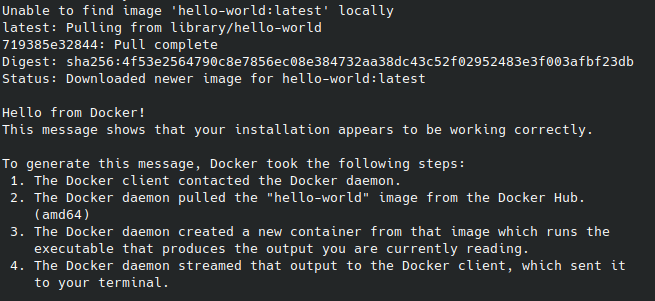

# Kontener przygotowany na zajęcia

Do wykładu został przygotowany kontener zawierający potrzebna pakiety Python oraz server Jupyter. 


**Proszę:**

* pobrać i uruchomić kontener [akalinow/ml_lecture](https://hub.docker.com/repository/docker/akalinow/ml_lecture/general)


Linux:

```
sudo docker run --name ml_lecture --rm -e DISPLAY=$DISPLAY  -v /home/$USER:/scratch -v /tmp/.X11-unix:/tmp/.X11-unix:ro  -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Windows:
```
mkdir %USERPROFILE%\Docker
docker pull akalinow/ml_lecture
docker run --name ml_lecture -v %WORKING_DIR%:/scratch -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Oczekiwany wynik:

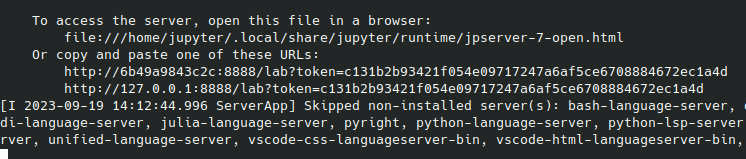

<br></br>
<br></br>
<br></br>

**Uwaga 1:** użycie GPU na lokalnym komputerze wymaga kilku dodatkowych kroków. Zainteresowane osoby proszę o kontakt.

**Uwaga 2:** na maszynach pod Linux polecam użycie [apptainer](https://apptainer.org/getting-started) zamiast Dockera. A apptainer można uruchamiać także kontenery zbudowane z Dockerem


**Proszę:**

* otworzyć adres URL serwera Jupyter ze swojej lokalnej maszyny
* pobrać notatnik z Colab
* uruchomić wszystkie komórki w notatniku na lokalnym komputerze

# Pakiety których będziemy używali w czasie zajęć:

* [numpy](https://numpy.org/) - podstawowa biblioteka do operacji numerycznych 
* [matplotlib](https://matplotlib.org/) - podstawowa biblioteka do wizualizacji danych
* [seaborn](https://seaborn.pydata.org/) - biblioteka z dedykowanymi funkcjami do wizualizacji danych statystycznych
* [plotly](https://plotly.com/python/) - biblioteka z zaawansowanymi funkcjami do wizualizacji, w szczególności do tworzenie interaktywnych wizualizacji
* [pandas](https://pandas.pydata.org/) - Python Data Analysis Library
* [TensorFlow](https://www.tensorflow.org/) - framework do tworzenia i obsługi modelu uczenia maszynowego firmy Google 

# Numpy

* podstawowym obiektem danych w Numpy są macierze - `np.array`
* operacje na macierzach są wykonywane **wektorowo** - wiele elementów macierzy jest przetwarzanych jednocześnie
* silnik biblioteki oparty na funkcjach zaimplementowanych w C

# Elementarne operacje na macierzach

**Proszę:**
* stworzyć i wypisać na ekran macierz numpy `x` o zawartości:
\begin{equation}
\begin{bmatrix}
1 & 2 & 1\\
5 & 5 & 4\\
0 & 1 & 2  
\end{bmatrix}
\end{equation}

* wypisać na ekran kształt tej macierzy:
  ```Python
  x.shape
  ```
* stworzyć macierz jednostkową  `y` o rzędzie macierzy `x`
  
* wypisać na ekran wynik działania operacji: $x+y,~~~ x \cdot y, ~~~ x*y$ 

**Proszę:**
* stworzyć macierz numpy `y` o zawartości:
$
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$

i kształcie `(1,3)`

* wypisać wynik działania: $x+y$

* usunąć ostatnią kolumnę z macierzy `y` i ponownie wypisać wynik działania $x+y$

In [3]:
import numpy as np
from termcolor import colored

x = np.array([(1,2,1),(5,5,4), (0,1,2)])
print(colored("x:\n","blue"),x)
print(colored("The shape of x is:","blue"),x.shape,"\n")

#BEGIN_SOLUTION
y = np.identity(x.shape[0])
print(colored("y:\n","blue"),y,"\n")

#Most of the matrix operations are element-wise
print(colored("Result of x+y:\n","blue"),x+y,"\n")

#Ordinary mathematical matrix operations have to selected with proper method:
print(colored("Result of x dot y:\n","blue"),x.dot(y),"\n")

#Ordinary mathematical matrix operations have to selected with proper method:
print(colored("Result of x*y:\n","blue"),x*y,"\n")

#Matrices are extended (broadcasted) when dimensions do not allow for element wise operations.
#the broadcasting is performed if it is possible for given input matrices shape:
y = np.array([[1,2,3]])
print(colored("y maxtrix is:\n","blue"),y,"\n")
print(colored("Result of x*y:\n","blue"),x*y,"\n")

#Select first two columns of the y matrix:
y = y[:,0:2]
print(colored("x maxtrix is:\n","blue"),x,"\n")
print(colored("y maxtrix is:\n","blue"),y,"\n")
print(colored("Result of x*y:\'n","blue"),x*y)
#END_SOLUTION

pass

x:
 [[1 2 1]
 [5 5 4]
 [0 1 2]]
The shape of x is: (3, 3) 

y:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Result of x+y:
 [[2. 2. 1.]
 [5. 6. 4.]
 [0. 1. 3.]] 

Result of x dot y:
 [[1. 2. 1.]
 [5. 5. 4.]
 [0. 1. 2.]] 

Result of x*y:
 [[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 2.]] 

y maxtrix is:
 [[1 2 3]] 

Result of x*y:
 [[ 1  4  3]
 [ 5 10 12]
 [ 0  2  6]] 

x maxtrix is:
 [[1 2 1]
 [5 5 4]
 [0 1 2]] 

y maxtrix is:
 [[1 2]] 



ValueError: operands could not be broadcast together with shapes (3,3) (1,2) 

# Pętle explicite vs implicite

**Proszę:**

* stworzyć tablicę `x` o kształcie (n,n) wypełnioną zerami
* wypełnić w pętli tablicę liczbami losowymi z rozkładu płaskiego w zakresie `[0,1]`
* w kolejnej pętli obliczyć sumę elementów: `s` oraz sumę kwadratów elementów: `s2`
* korzystając z `s` oraz `s2` obliczyć wariancję `v` elementów tablicy `x`:
\begin{equation}
V = E_{x\sim p(x)}(x^{2}) - E_{x \sim p(x)}(x)^{2}
\end{equation}
* wypisać na ekran `v*12` (jakiej wartości się spodziewamy?)
* zmierzyć czas wykonywania kodu komórki używając polecenia Jupyter magic na początku komórki:
  
  ```
  %%time
  ``` 

In [6]:
%%time

#BEGIN_SOLUTION
n = 100
x = np.full((n,n), 0.0)

for i in range(0,x.size):
    x[int(i/n), i%n] = np.random.default_rng().random()

s = 0.0
s2 = 0.0
for i in range(0,x.size):
    s += x[int(i/n), i%n] 
    s2 += x[int(i/n), i%n]**2

v = s2/x.size - (s/x.size)**2
#END_SOLUTION
print(colored("Variance x 12:","blue"),v*12)    

Variance x 12: 0.9986458729195442
CPU times: user 226 ms, sys: 11.3 ms, total: 238 ms
Wall time: 235 ms


**Proszę:**

Używając jedynie funkcji biblioteki numpy bez, pętli, z jedną linią na polecenie:

* stworzyć tablicę `x` o kształcie (n,n) wypełnioną liczbami losowymi z rozkładu płaskiego w zakresie `[0,1]`
* obliczyć sumę elementów: `s` oraz sumę kwadratów elementów: `s2`
* korzystając z `s` oraz `s2` obliczyć wariancję `v` elementów tablicy `x`
* wypisać na ekran `v*12` (jakiej wartości się spodziewamy?)
* zmierzyć czas wykonywania kodu komórki
  

**Proszę:** zwrócić uwagę na czas wykonania obu komórek  

In [7]:
%%time

x = np.random.default_rng().uniform(0.0, 1.0, (n,n))
s = np.sum(x)
s2 = np.sum(x*x)
v = s2/x.size - (s/x.size)**2
print(colored("Variance x 12:","blue"),v*12) 

Variance x 12: 1.0077937527823104
CPU times: user 411 µs, sys: 293 µs, total: 704 µs
Wall time: 510 µs


# Generacja liczba z rozkładu Gaussa

**Proszę:**

Skorzystać z centralnego twierdzenia granicznego i wygenerować próbkę liczb `z` pochodzącą z rozkładu normalnego według następującego algorytmu:

1) generacja `nComponents` liczb $x_{i}$ z rozkładu płaskiego `[0,1]`
2) $z = \sum_{i} x_{i} - 0.5 \cdot 12$

Korzystając z powyższego algorytmu proszę wygenerować macierz numpy zawierającą`nSamples=10000` liczb z rozkładu normalnego

**Uwaga:** nie wolno używać pętli. Kod generacji powinien zająć maksymalnie **2** linie

In [121]:
%%time
#BEGIN_SOLUTION
nSamples = 10000
nComponents = 12

x = np.random.default_rng().uniform(0.0, 1.0, (nSamples,nComponents))
z = np.sum(x,axis=1) - 6
#END_SOLUTION
pass

CPU times: user 1.44 ms, sys: 369 µs, total: 1.81 ms
Wall time: 1.03 ms


In [116]:
z.shape

(10000,)

# Matplotlib

* biblioteka do tworzenia rysunków. Podstawowy moduł to:
```Python
import matplotlib.pyplot as plt
```
<br></br>
* staramy się tworzyć czytelne rysunki:
    * opisane osie
    * czytelna legenda
    * wystarczający rozmiar czcionek na rysunku. Proponuję następujące ustawienia:
    ```Python
    #Increase plots font size
    params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (10, 7),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}
    plt.rcParams.update(params)
    ```
* zawsze warto zajrzeć do galerii przykładów

NameError: name 'np' is not defined

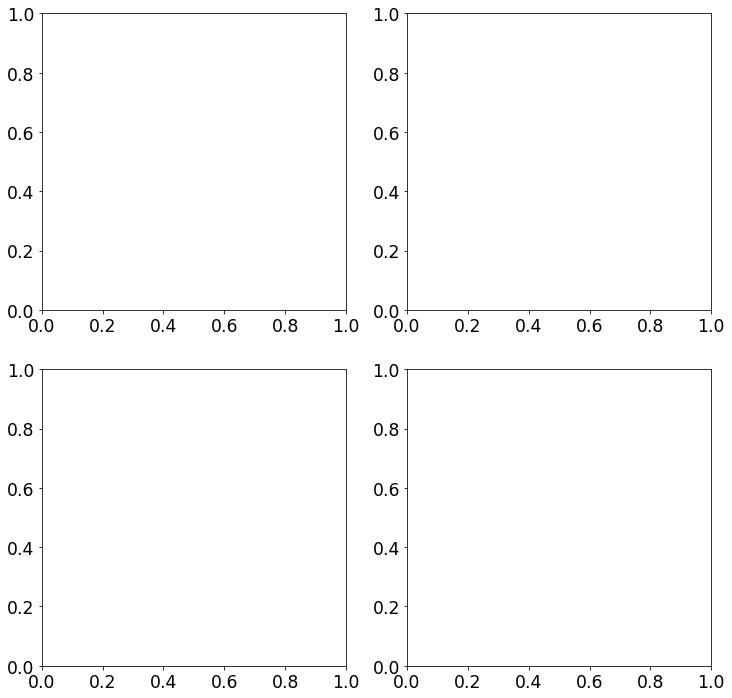

In [1]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'xx-large',
              'figure.figsize': (10, 7),
              'axes.labelsize': 'xx-large',
              'axes.titlesize':'xx-large',
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

fig, axes = plt.subplots(2,2, figsize=(12, 12))

##########
axes[0,0].plot(np.random.default_rng().uniform(0,1,100), 
               np.random.default_rng().uniform(0,1, 100),
               "rs", label="uniform")
axes[0,0].set_xlabel("x")
axes[0,0].set_ylabel("y")
axes[0,0].legend(loc="lower right");

##########
axes[0,1].plot(np.random.default_rng().standard_normal(100), 
               np.random.default_rng().standard_normal(100),
               "bs", label="normal")
axes[0,1].set_xlabel("x")
axes[0,1].set_ylabel("y")
axes[0,1].legend(loc="upper right");

##########
axes[1,0].hist2d(np.random.default_rng().standard_normal(100), 
                np.random.default_rng().standard_normal(100),
                bins = 25,
                label="normal")
axes[1,0].set_xlabel("x")
axes[1,0].set_ylabel("y")

##########
axes[1,1].plot([0,1], [0,1], label="diagonal")
axes[1,1].plot([0,1], [1,0], label="antidiagonal")
axes[1,1].set_xlabel("x")
axes[1,1].set_ylabel("y")
axes[1,1].legend(loc="upper right");

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
plt.savefig("fig_png/example1.png", bbox_inches="tight")

**Proszę:**

* stworzyć panel z dwoma rysunkami: **1 rząd, 2 kolumny**
* po lewej narysować:
    * histogram wartości macierzy `z` zawierającej wygenerowane wcześniej liczby
    * histogram znormalizować by można go było porównać z krzywą rozkładu normalnego
    * linię dla rozkładu normalnego
* po prawej narysować:
    * dystrybuantę wartości macierzy `z`
    * pionową linię dla `z=0`
    * poziomą linię na wysokości odpowiadającej 50%
    * oś Y podpisać jako "$\int_{-\infty}^{z} p(z) dz$


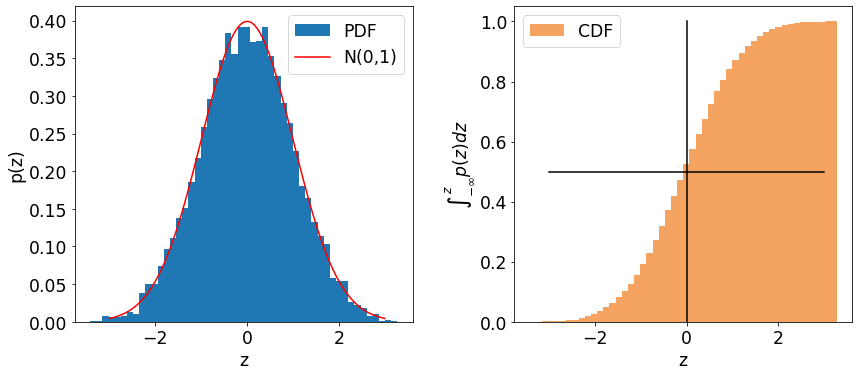

In [129]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

#BEGIN_SOLUTION
##########
axes[0].hist(z, bins=50, density=True, label="PDF")
x = np.linspace(-3,3, 100)
y = 1.0/np.sqrt(2*np.pi)*np.exp(-x**2/2)
axes[0].plot(x,y, 'r', label="N(0,1)")
axes[0].set_xlabel("z")
axes[0].set_ylabel("p(z)")
axes[0].legend(loc="upper right");

##########
axes[1].hist(z, color='sandybrown', bins=50, cumulative=True, weights = np.full_like(z, 1/z.size), label="CDF")
axes[1].plot((0,0), (0,1), color='black')
axes[1].plot((-3, 3), (0.5, 0.5), color='black')
axes[1].set_xlabel("z")
axes[1].set_ylabel(r"$\int_{-\infty}^{z} p(z) dz$")
axes[1].legend(loc="upper left");
##########
#END_SOLUTION
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
plt.savefig("fig_png/example1.png", bbox_inches="tight")